In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import missingno as msno
import matplotlib.pyplot as plotter
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
# locating the path of directory
print(os.getcwd())

C:\Users\Ameya


In [4]:
pwd

'C:\\Users\\Ameya'

In [5]:
# os.chdir("F:\College_Lectures\EXTRA PROJECTS\Indian-food")
# for changing the location of the file

In [6]:
suicide = pd.read_csv("C:/Users/Ameya/suicide_rates.csv")

In [7]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [9]:
# checking for missing values
suicide.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [10]:
# dropping the rows with missing value
suicide.dropna(inplace=True)
suicide.shape

(8364, 12)

In [11]:
suicide.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year          False
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [12]:
# dropping non-required columns
suicide = suicide.drop(["HDI for year"],axis=1)
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,"2,424,499,009",835,Generation X


In [13]:
# dropping non-required columns
suicide = suicide.drop(["country-year"],axis=1)
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,"2,424,499,009",835,Generation X


In [14]:
# convert sex column to one and zero
suicide['sex'] = suicide['sex'].map({'male': 1, 'female': 0})
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,1,25-34 years,13,232900,5.58,"2,424,499,009",835,Generation X
73,Albania,1995,1,55-74 years,9,178000,5.06,"2,424,499,009",835,Silent
74,Albania,1995,0,75+ years,2,40800,4.90,"2,424,499,009",835,G.I. Generation
75,Albania,1995,0,15-24 years,13,283500,4.59,"2,424,499,009",835,Generation X
76,Albania,1995,1,15-24 years,11,241200,4.56,"2,424,499,009",835,Generation X


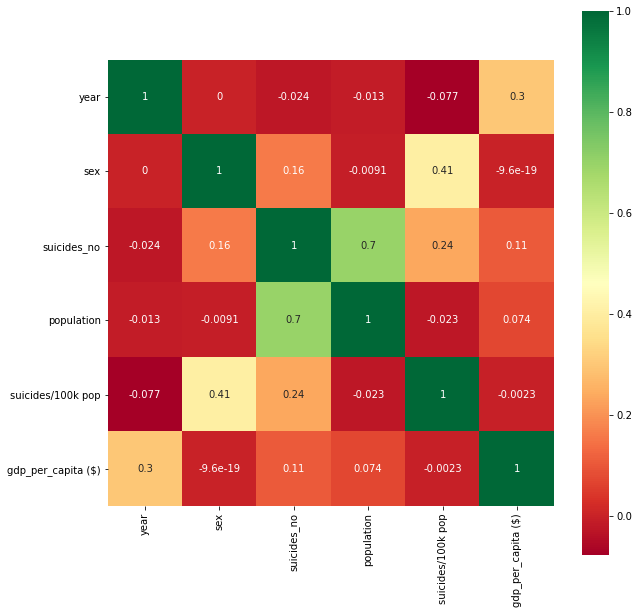

In [15]:
# finding the colorelaltion between the columns
plt.figure(figsize=(10,10))  # figure size is set
p=sns.heatmap(suicide.corr(), annot=True,cmap='RdYlGn',square=True)

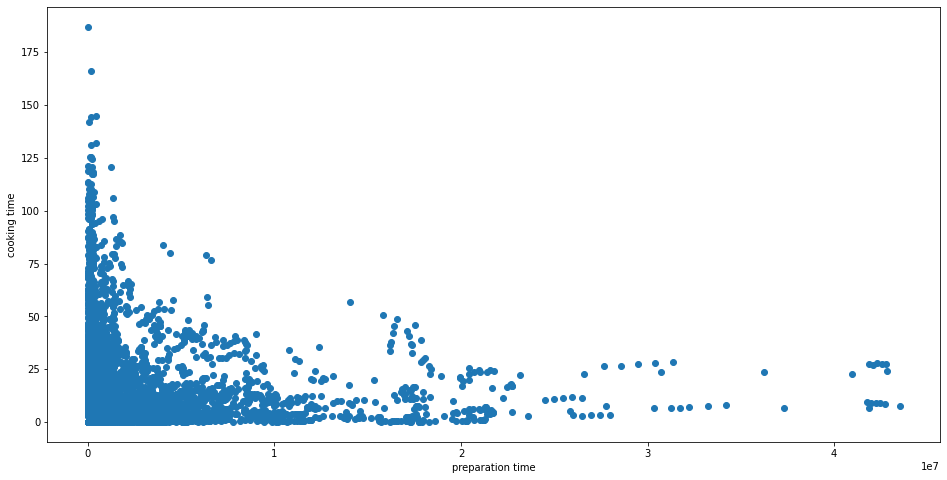

In [16]:
# detecting the outliers 
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(suicide['population'], suicide['suicides/100k pop'])
ax.set_xlabel('preparation time')
ax.set_ylabel('cooking time')
plt.show()

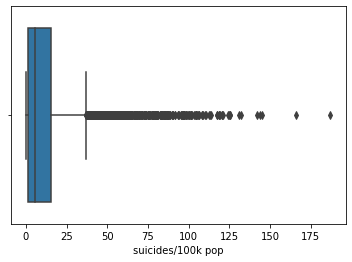

In [17]:
# detecting the outliers with different method
sns.boxplot(x=suicide['suicides/100k pop'])

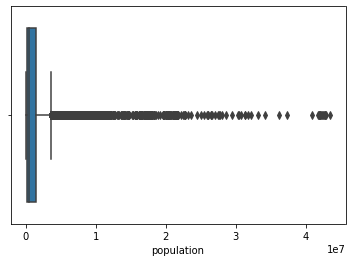

In [18]:
# detecting the outliers with different method
sns.boxplot(x=suicide['population'])

In [19]:
# calculating Q1 
Q1 = np.percentile(suicide.population, 25)  # Q1
Q1

121642.5

In [20]:
np.percentile(suicide.population, 50)  # median

472250.5

In [21]:
Q3 = np.percentile(suicide.population, 75)  # Q3
Q3

1500289.75

In [22]:
IQR = Q3-Q1
IQR

1378647.25

In [23]:
# calculating all at once
np.percentile(suicide.population, [25, 50, 75])

array([ 121642.5 ,  472250.5 , 1500289.75])

In [24]:
# Removing outlier with the help of IQR
Suicide_out = suicide[~((suicide.population < (Q1 - 1.5 * IQR)) |(suicide.population > (Q3 + 1.5 * IQR)))]
print(Suicide_out.shape)

(7124, 10)


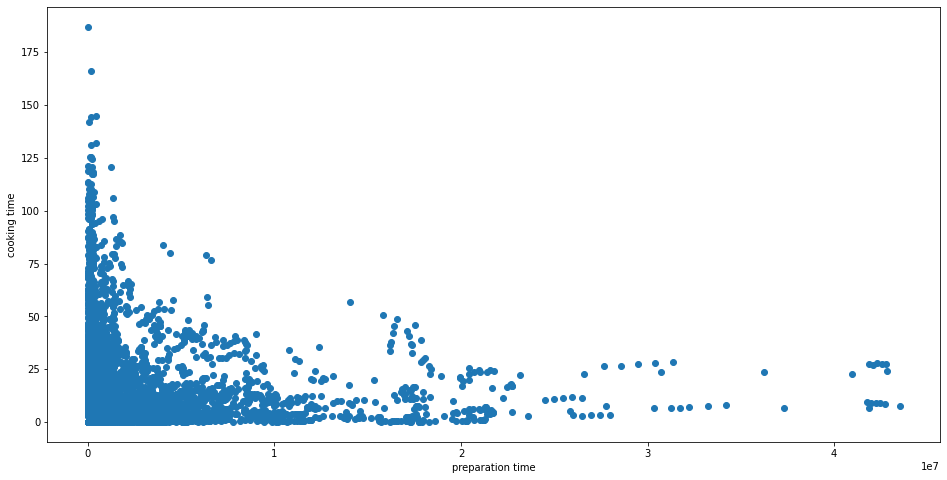

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(suicide['population'], suicide['suicides/100k pop'])
ax.set_xlabel('preparation time')
ax.set_ylabel('cooking time')
plt.show()

In [26]:
# finding the duplicates
dup = suicide.duplicated(subset=None, keep='first').sum()
dup

0

In [27]:
## EDA ##

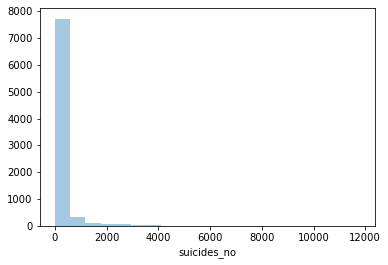

In [28]:
# Histogram of suicide
sns.distplot(suicide.suicides_no, kde = False , bins= 20);

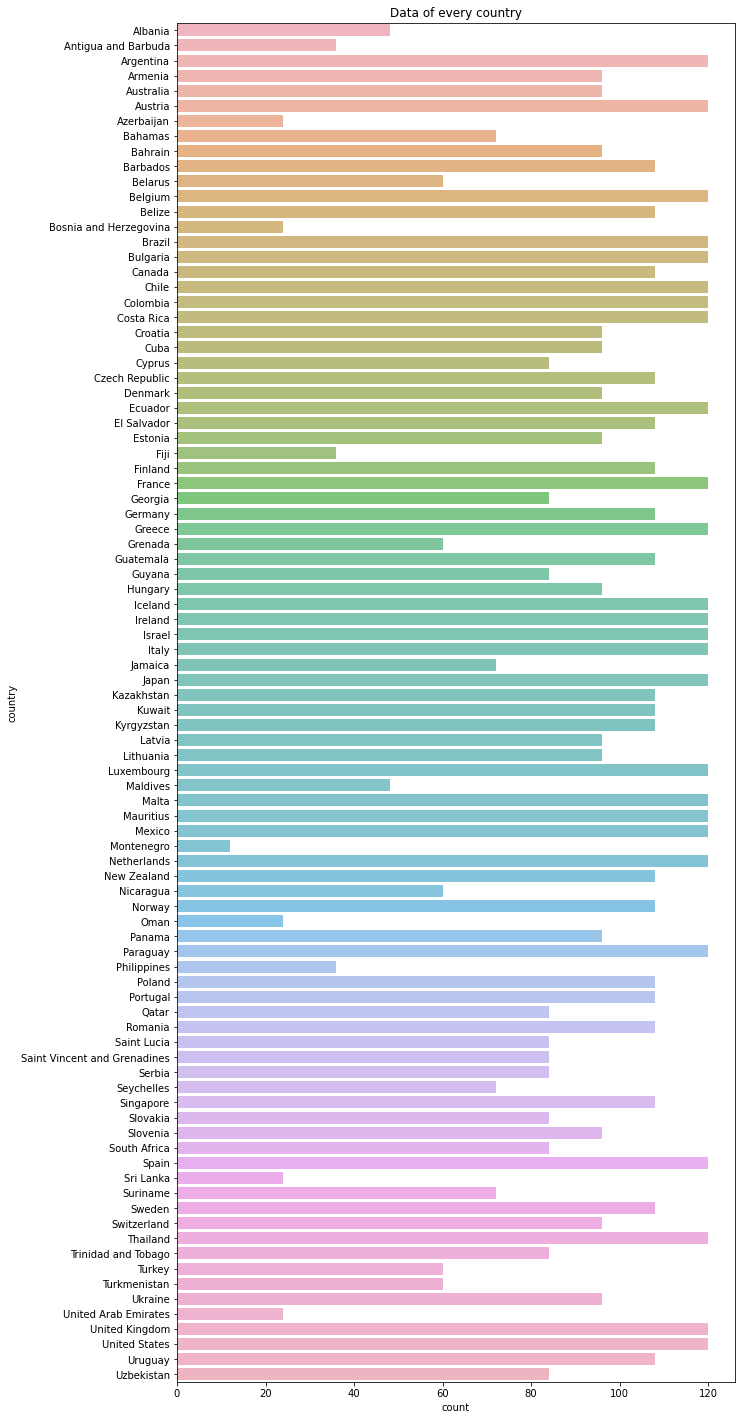

In [29]:
### checking data of every country
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=suicide, alpha=alpha)
plt.title('Data of every country')
plt.show()

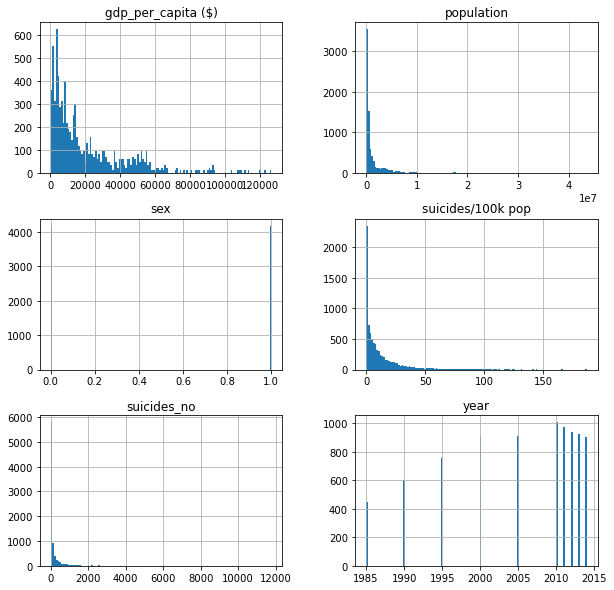

In [30]:
# histogram for displaying the data
p = suicide.hist(figsize = (10,10),bins=130)

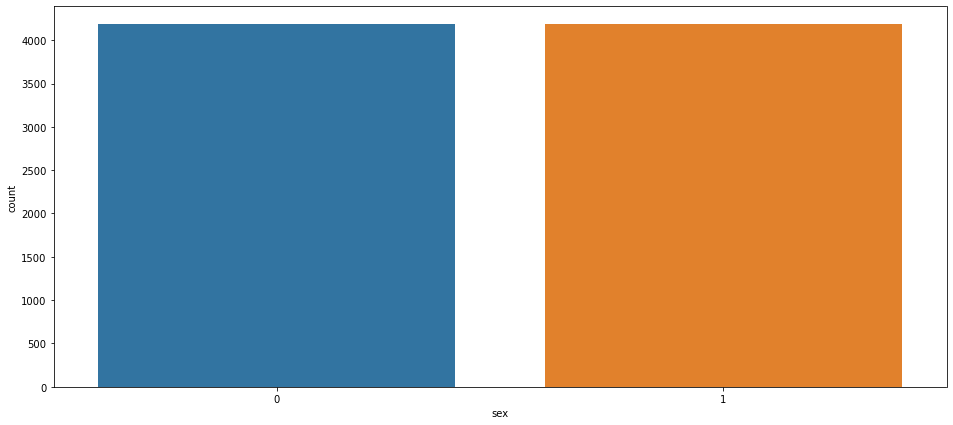

In [31]:
### size of the figure
plt.figure(figsize=(16,7))
### checking gender equality with bar plot
sex = sns.countplot(x='sex',data = suicide)

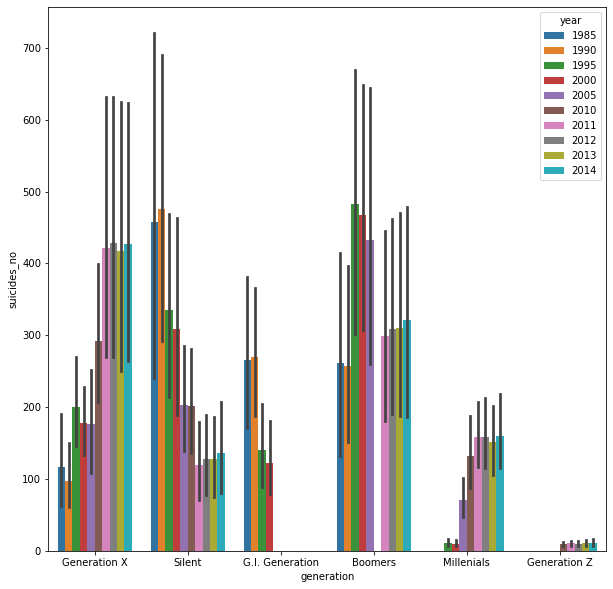

In [32]:
# maximum suicide at which age
plt.figure(figsize=(10,10))
bar_age = sns.barplot(x = 'generation', y = 'suicides_no', hue = 'year',data = suicide)

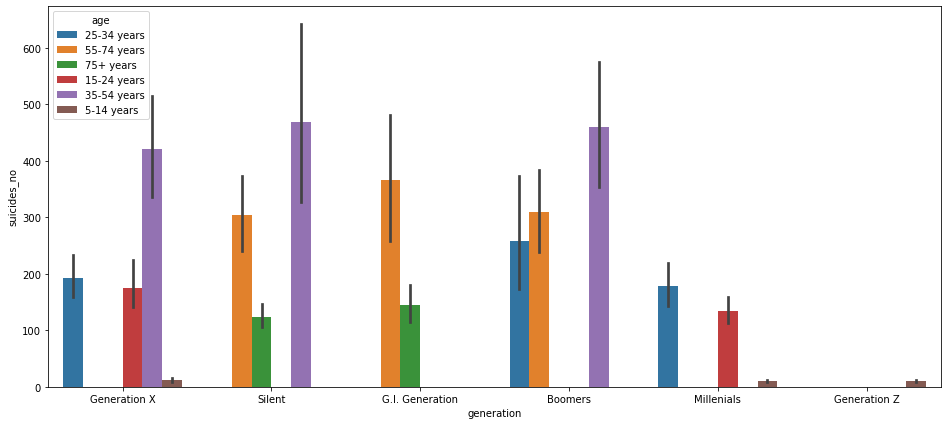

In [33]:
#plotting the suicide rate depending on age and generation
plt.figure(figsize=(16,7))
bar_age = sns.barplot(x = 'generation', y = 'suicides_no', hue = 'age',data = suicide)

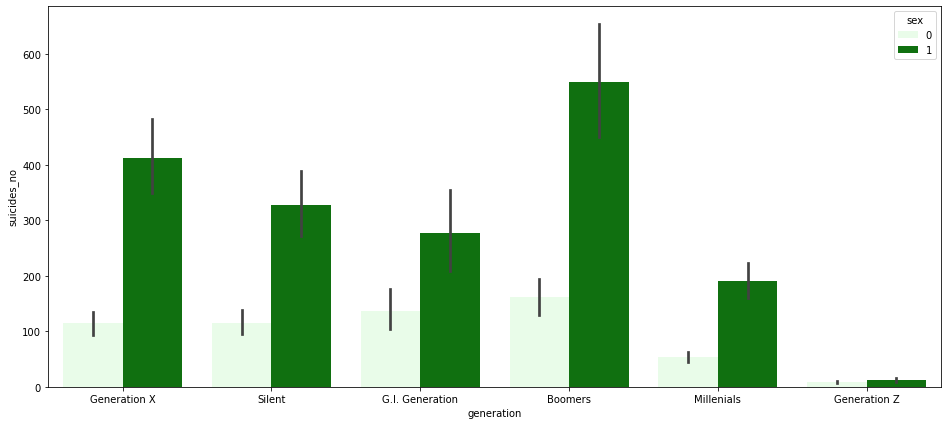

In [34]:
# getting the graph of suicides done in generation wrt to sex
plt.figure(figsize=(16,7))
bar_age = sns.barplot(x = 'generation', y = 'suicides_no', hue = 'sex',data = suicide, color='green')

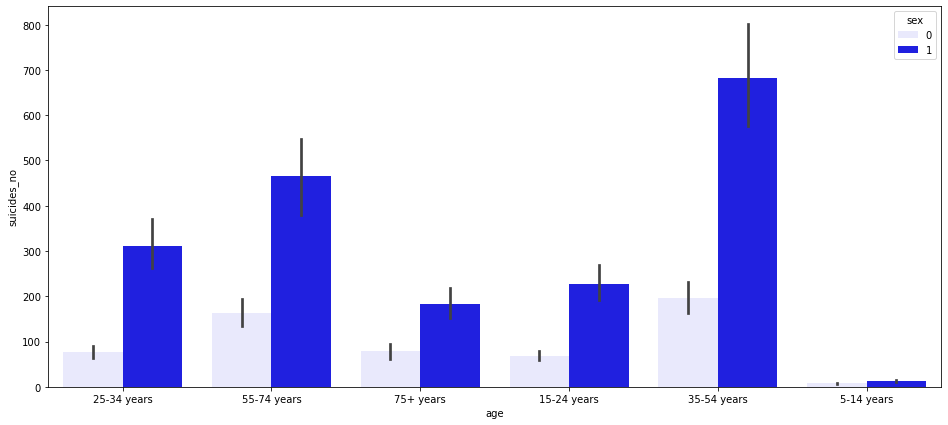

In [35]:
# getting the ratio of suicide count of gender wrt to age
plt.figure(figsize=(16,7))
bar_age = sns.barplot(x = 'age', y = 'suicides_no', hue = 'sex',data = suicide, color='blue')

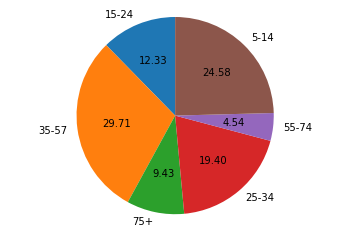

In [36]:
# exploring suicide number of male with pie-chart
# The slice names of a population distribution pie chart

pieLabels = '15-24', '35-57', '75+', '25-34', '55-74', '5-14'

male_suicide_no     = [20.83, 50.21, 15.94, 32.79, 7.68, 41.54]

figureObject, axesObject = plotter.subplots()

#pie-chart

axesObject.pie(male_suicide_no, labels=pieLabels, autopct='%1.2f',startangle=90)

axesObject.axis('equal') # Aspect ratio - equal means pie is a circle 

plotter.show()

In [37]:
# feature engineering
suicide = suicide.drop(["country"],axis=1)
suicide

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,1995,1,25-34 years,13,232900,5.58,"2,424,499,009",835,Generation X
73,1995,1,55-74 years,9,178000,5.06,"2,424,499,009",835,Silent
74,1995,0,75+ years,2,40800,4.90,"2,424,499,009",835,G.I. Generation
75,1995,0,15-24 years,13,283500,4.59,"2,424,499,009",835,Generation X
76,1995,1,15-24 years,11,241200,4.56,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...
27815,2014,0,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,2014,0,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,2014,1,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,2014,0,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [38]:
suicide['age'].unique()

array(['25-34 years', '55-74 years', '75+ years', '15-24 years',
       '35-54 years', '5-14 years'], dtype=object)

In [39]:
# convert age column to numerical
suicide['age'] = suicide['age'].map({'5-14 years': 0, '15-24 years': 1, '25-34 years' : 2, '35-54 years' : 3, '55-74 years' : 4,
                                    '75+ years' : 5})
suicide.head()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,1995,1,2,13,232900,5.58,"2,424,499,009",835,Generation X
73,1995,1,4,9,178000,5.06,"2,424,499,009",835,Silent
74,1995,0,5,2,40800,4.90,"2,424,499,009",835,G.I. Generation
75,1995,0,1,13,283500,4.59,"2,424,499,009",835,Generation X
76,1995,1,1,11,241200,4.56,"2,424,499,009",835,Generation X


In [40]:
suicide['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [41]:
# convert age column to numerical
suicide['generation'] = suicide['generation'].map({'Generation X': 0, 'Silent': 1, 'G.I. Generation' : 2, 'Boomers' : 3, 'Millenials' : 4,
                                    'Generation Z' : 5})
suicide.head()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,1995,1,2,13,232900,5.58,"2,424,499,009",835,0
73,1995,1,4,9,178000,5.06,"2,424,499,009",835,1
74,1995,0,5,2,40800,4.90,"2,424,499,009",835,2
75,1995,0,1,13,283500,4.59,"2,424,499,009",835,0
76,1995,1,1,11,241200,4.56,"2,424,499,009",835,0


In [42]:
# remove the comma from gdp
suicide = suicide.replace(',','', regex=True)
# converting into int
c = suicide.select_dtypes(object).columns
suicide[c] = suicide[c].apply(pd.to_numeric,errors='coerce')
suicide.head()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,1995,1,2,13,232900,5.58,2424499009,835,0
73,1995,1,4,9,178000,5.06,2424499009,835,1
74,1995,0,5,2,40800,4.90,2424499009,835,2
75,1995,0,1,13,283500,4.59,2424499009,835,0
76,1995,1,1,11,241200,4.56,2424499009,835,0


In [43]:
# applying the model
X = suicide.drop(['suicides_no'], inplace=False, axis=1)
y = suicide['suicides_no']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
#Linear model
lm = LinearRegression()
from sklearn import linear_model

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
Lin_reg = linear_model.LinearRegression(normalize=True)
Lin_reg.fit(X_train,y_train)
y0_pred = Lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y0_pred)
mae = mean_absolute_error(y_test, y0_pred)
rmse = mean_squared_error(y_test, y0_pred)**0.5
r2 = r2_score(y_test, y0_pred)

print('MAE (Mean Absolute Error): %0.3f' %mae)
print('MSE (Mean Squared Error): %0.3f' %mse)
print('RMSE (Root mean squared error): %0.3f' %rmse)
print('R2 score: %0.3f' %r2)

MAE (Mean Absolute Error): 186.048
MSE (Mean Squared Error): 180387.128
RMSE (Root mean squared error): 424.720
R2 score: 0.591


In [46]:
# LASSO REGRESSION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
las_reg = linear_model.Lasso(normalize=True)
las_reg.fit(X_train,y_train)
y1_pred = las_reg.predict(X_test)

mse = mean_squared_error(y_test, y1_pred)
mae = mean_absolute_error(y_test, y1_pred)
rmse = mean_squared_error(y_test, y1_pred)**0.5
r2 = r2_score(y_test, y1_pred)

print('MAE (Mean Absolute Error): %0.3f' %mae)
print('MSE (Mean Squared Error): %0.3f' %mse)
print('RMSE (Root mean squared error): %0.3f' %rmse)
print('R2 score: %0.3f' %r2)

MAE (Mean Absolute Error): 144.655
MSE (Mean Squared Error): 196260.511
RMSE (Root mean squared error): 443.013
R2 score: 0.555


In [48]:
#random forest regression
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train,y_train)
y2_pred = RF_reg.predict(X_test)

mse = mean_squared_error(y_test, y2_pred)
mae = mean_absolute_error(y_test, y2_pred)
rmse = mean_squared_error(y_test, y2_pred)**0.5
r2 = r2_score(y_test, y2_pred)

print('MAE (Mean Absolute Error): %0.3f' %mae)
print('MSE (Mean Squared Error): %0.3f' %mse)
print('RMSE (Root mean squared error): %0.3f' %rmse)
print('R2 score: %0.3f' %r2)

MAE (Mean Absolute Error): 10.526
MSE (Mean Squared Error): 3740.189
RMSE (Root mean squared error): 61.157
R2 score: 0.992


In [63]:
# collecting all R2 values
R2_Scores = [0.59,0.55]
models = ['Linear Regression' , 'Lasso Regression' ,'RandomForest Regression']

In [64]:
# tuning parameters
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
RF_reg=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
RF_reg.fit(X_train,y_train)
pred=RF_reg.predict(X_test)
r2 = r2_score(y_test, y2_pred)
print('R2     : %0.3f ' % r2)
R2_Scores.append(r2)

R2     : 0.992 


In [65]:
R2_Scores

[0.59, 0.55, 0.991526198262205]

In [66]:
comp_sui = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
comp_sui.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
2,RandomForest Regression,0.991526
0,Linear Regression,0.590000
1,Lasso Regression,0.550000


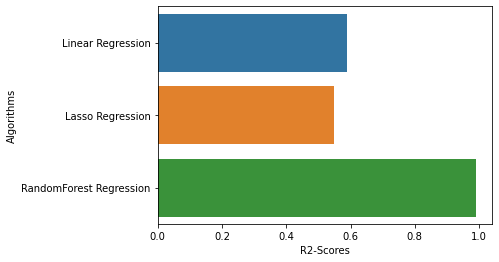

In [67]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=comp_sui)